In [82]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve , roc_auc_score

In [2]:
cd

C:\Users\Ali


In [17]:
# General idea of default prppability
#s = cancer.diagnosis.sum()/ len(cancer.diagnosis)
#print(s)
print(cancer.shape)
print(cancer[cancer.diagnosis == 'B'][['diagnosis']].count())
print(cancer[cancer.diagnosis == 'M'][['diagnosis']].count())

(569, 31)
diagnosis    0
dtype: int64
diagnosis    0
dtype: int64


C:\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [14]:
cancer['diagnosis'].replace(to_replace='B', value=0 , inplace=True , regex=True)
cancer['diagnosis'].replace(to_replace='M',value=1, inplace=True , regex=True)

In [23]:
cancer.head()
print(cancer['diagnosis'].value_counts())
print(cancer['diagnosis'].dtype)

0    357
1    212
Name: diagnosis, dtype: int64
int64


In [49]:
s = cancer.groupby(['diagnosis']).size().to_frame()

print(type(s))
s['prob'] = (s[0]/(569)) 
s

<class 'pandas.core.frame.DataFrame'>


,0,prob
diagnosis,,
0,357,0.627417
1,212,0.372583


In [3]:
cancer = pd.read_csv(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/KNN.csv')

In [4]:
del cancer['id']

In [5]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
X = cancer.iloc[:,1:]

In [7]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
y = cancer.iloc[:,:1]

In [9]:
y.head()

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [31]:
#model = LogisticRegression()
#model = DecisionTreeClassifier()
model = RandomForestClassifier()
import warnings
warnings.filterwarnings('ignore')

In [32]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
expected = y_test

predicted = model.predict(X_test)

In [34]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [35]:
y_test.diagnosis.value_counts()

B    66
M    48
Name: diagnosis, dtype: int64

In [16]:

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96        66
           M       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
print(metrics.confusion_matrix(expected, predicted))

[[65  1]
 [ 4 44]]


In [18]:
features = X.columns
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [19]:
## Understanding the importance of each feature
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(model, features)

,feat,score
23,area_worst,0.149294
22,perimeter_worst,0.131941
20,radius_worst,0.105314
3,area_mean,0.099727
7,points_mean,0.074543
2,perimeter_mean,0.069064
27,points_worst,0.050924
13,area_se,0.041973
0,radius_mean,0.040058
6,concavity_mean,0.038001


In [36]:
ytrain_prob = model.predict_proba(X_train)
ytest_prob = model.predict_proba(X_test)
ytest_prob
print('ROC of train is : {}'.format(roc_auc_score(y_train , ytrain_prob[:,-1])))

print('ROC of test is : {}'.format(roc_auc_score(y_test , ytest_prob[:,-1])))

ROC of train is : 1.0
ROC of test is : 0.9982638888888888


In [37]:
ytest_prob[0:5]

array([[0.  , 1.  ],
       [0.88, 0.12],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

# Logistic classifier

In [38]:
model2  = LogisticRegression()
model2.fit(X_train , y_train)
ytrain_prob = model2.predict_proba(X_train)
ytest_prob = model2.predict_proba(X_test)
ytest_prob
print('ROC of train is : {}'.format(roc_auc_score(y_train , ytrain_prob[:,-1])))

print('ROC of test is : {}'.format(roc_auc_score(y_test , ytest_prob[:,-1])))

ROC of train is : 0.9921632721481854
ROC of test is : 0.973800505050505


In [39]:
ytest_prob[0:5]

array([[3.26993399e-08, 9.99999967e-01],
       [9.99540486e-01, 4.59513913e-04],
       [9.53558536e-01, 4.64414640e-02],
       [9.95022827e-01, 4.97717262e-03],
       [1.44262380e-12, 1.00000000e+00]])

# KNN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
ytrain_prob = knn.predict_proba(X_train)
ytest_prob = knn.predict_proba(X_test)
ytest_prob
print('ROC of train is : {}'.format(roc_auc_score(y_train , ytrain_prob[:,-1])))

print('ROC of test is : {}'.format(roc_auc_score(y_test , ytest_prob[:,-1])))

ROC of train is : 0.9933995473975359
ROC of test is : 0.9362373737373737


In [41]:
ytest_prob[0:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

#### Selecting the best threshold for best accuracy


In [55]:
pred=  []
for model in [model , model2 , knn]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,-1]))
final_predictions = pd.concat(pred , axis = 1).mean(axis=  1)
print('Ensemble test roc_auc score : {}'.format(roc_auc_score(y_test , final_predictions)))

pred

Ensemble test roc_auc score : 0.9728535353535352


[0      1.0
 1      0.0
 2      0.0
 3      0.0
 4      1.0
       ... 
 109    0.0
 110    0.0
 111    0.0
 112    0.8
 113    1.0
 Length: 114, dtype: float64,
 0      1.000000
 1      0.000460
 2      0.046441
 3      0.004977
 4      1.000000
          ...   
 109    0.081459
 110    0.004325
 111    0.002651
 112    0.888247
 113    1.000000
 Length: 114, dtype: float64,
 0      1.0
 1      0.0
 2      0.0
 3      0.0
 4      1.0
       ... 
 109    0.0
 110    0.0
 111    0.0
 112    0.8
 113    1.0
 Length: 114, dtype: float64]

In [56]:
final_predictions

0      1.000000
1      0.000153
2      0.015480
3      0.001659
4      1.000000
         ...   
109    0.027153
110    0.001442
111    0.000884
112    0.829416
113    1.000000
Length: 114, dtype: float64

In [66]:
final_predictions = pd.concat(pred , axis = 1)
final_predictions

,0,1,2
0,1.0,1.000000,1.0
1,0.0,0.000460,0.0
2,0.0,0.046441,0.0
3,0.0,0.004977,0.0
4,1.0,1.000000,1.0
...,...,...,...
109,0.0,0.081459,0.0
110,0.0,0.004325,0.0
111,0.0,0.002651,0.0
112,0.8,0.888247,0.8


In [67]:
final_predictions = pd.concat(pred , axis = 1).mean(axis=  1)
final_predictions

0      1.000000
1      0.000153
2      0.015480
3      0.001659
4      1.000000
         ...   
109    0.027153
110    0.001442
111    0.000884
112    0.829416
113    1.000000
Length: 114, dtype: float64

In [64]:
y_test.replace(to_replace = ['B' , 'M'] , value = [0 , 1] , inplace = True)
y_test.astype('int32')
y_test.value_counts()

diagnosis
0            66
1            48
dtype: int64

In [69]:
fpr , tpr , threshold = roc_curve(y_test , final_predictions)
#print(fpr)
#print(tpr)
print(threshold)

[2.00000000e+00 1.00000000e+00 9.98028699e-01 9.92866167e-01
 7.13936753e-01 6.07867661e-01 4.30370529e-01 3.27563627e-01
 3.18221135e-01 1.50607688e-01 1.47605914e-01 1.34586839e-01
 7.37524226e-02 4.26286557e-02 2.77649455e-02 2.71530671e-02
 2.22443206e-02 2.57773147e-05]


In [75]:
import numpy as np
from sklearn.metrics import accuracy_score
acuracy_list = []
for thres in threshold:
    pred = np.where(final_predictions > thres , 1 , 0)
    acuracy_list.append(accuracy_score(y_test , pred))
acuracy_list = pd.concat([pd.Series(threshold) , pd.Series(acuracy_list)] , axis = 1)
acuracy_list
acuracy_list.columns = ['threshold' , 'acurracy']
acuracy_list.sort_values(by = 'acurracy' , ascending = False , inplace = True)

In [78]:
acuracy_list # We go with first theshold

,threshold,acurracy
6,0.430371,0.921053
5,0.607868,0.903509
4,0.713937,0.894737
7,0.327564,0.894737
8,0.318221,0.885965
9,0.150608,0.877193
15,0.027153,0.868421
10,0.147606,0.868421
11,0.134587,0.868421
12,0.073752,0.868421


In [88]:
def plot_roc_auc(fpr , tpr , dddd):
    plt.plot(fpr , tpr , c = 'orange' , label = dddd)
    plt.plot([0,1] , [0,1] , c = 'b' , linestyle = '--')
    plt.xlabel('Flase positive')
    plt.ylabel('true postive')
    plt.title('ROUC Curve of cancer Data')
    plt.legend()
    plt.show()

0.9728535353535352


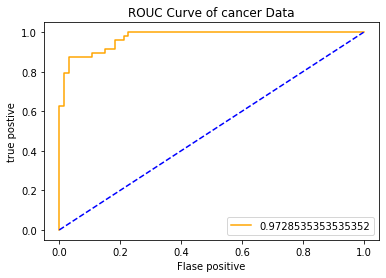

In [89]:
import matplotlib.pyplot as plt
from sklearn import metrics
auc_curve = metrics.auc(fpr , tpr)
print(auc_curve)
plot_roc_auc(fpr , tpr , auc_curve)
